In [1]:
from utilities.foam_automation.caserunner import run_until_convergence
from utilities.foam_automation.error import mseU_2Dxy
from utilities.json_io import write_suggestion
import numpy as np
import os
import fileinput
import sys
from utilities.foam_automation.caserunner import get_endtime
import pandas as pd
from utilities.control import initialize
from update_history import register_score
from utilities.json_io import load_history_to_dict


In [2]:
def set_foam_coef(foamdir,coeffs):
    for coef in coeffs:
        entry = coef
        value = coeffs[coef]
        # Changes an entry in the system/dict_name to be value
        #print('Setting new foam coef: ' + str(a1))
        for line in fileinput.input(os.path.join(foamdir,'constant/turbulenceProperties'), inplace=True):
            if line.strip().startswith(entry):
                line = '\t'+entry+'\t'+ str(value) + ';\n'
            sys.stdout.write(line)
    return

a1_vec = np.around(np.linspace(0.15,0.8,300),4)
history_directory = 'foam/gridsearch_a1_phll/tuner'

In [7]:
# Run simulation loop
for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    os.system(f'cp -r foam/gridsearch_a1_phll/case_1p0_template {casedir}')
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    set_foam_coef(casedir,search_point)
    #Uncomment to run
    #last_time = run_until_convergence(case = casedir, n_proc = 16)
    
#
    #directory = 'foam/case_1p0/tuner'
    #initialize(directory = directory,
    #           coeff_bounds = coef,
    #           restart = False)

    #suggest(directory = directory,
    #                       random_state=7)

    #search_point = load_suggestion(directory = directory)
    #target = black_box_function_sim_dummy(search_point)
    #register_score(score=target, directory = directory)
    

Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.

In [4]:
# Calculate errors loop

ref_df = pd.read_csv('foam/gridsearch_a1_phll/tuner/refdata.csv')
initialize(directory = history_directory,
           coeff_bounds = {'a1':[min(a1_vec),max(a1_vec)]},
           restart = True)

for a1 in a1_vec:
    casedir = f'foam/gridsearch_a1_phll/case_1p0_a1_{a1}'
    endtime = get_endtime(case=casedir)
    #print(endtime)
    score = -mseU_2Dxy(foamdirectory=casedir,foamtime=endtime,ref_df=ref_df)
    #print(mse)
    search_point = {'a1': a1}
    write_suggestion(directory = history_directory, suggestion = search_point)
    register_score(score=score, directory = history_directory)



Saving coeff_bounds to foam/gridsearch_a1_phll/tuner/coeff_bounds.json
Removing old history and suggestion files....
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
No history file exists at foam/gridsearch_a1_phll/tuner/history.json, creating and registering first point
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/history.json
Saving suggestion to foam/gridsearch_a1_phll/tuner/suggestion.json
Registering score in foam/gridsearch_a1_phll/tuner/his

In [5]:
history = load_history_to_dict(history_directory,'history.json')
param = [d['params']['a1'] for d in history]
target = [d['target'] for d in history]

[-2.466547322840756e-05, -2.3300893836578992e-05, -2.7916139904196577e-05, -2.7443275276943687e-05, -2.8174783522166515e-05, -2.5641766501330933e-05, -2.2678564580158122e-05, -2.271709342161399e-05, -2.2267183877876428e-05, -2.2551866736496256e-05, -2.5738087371542577e-05, -2.2122614537471908e-05, -2.2929404699454456e-05, -2.4804685942802594e-05, -2.2013109690833132e-05, -2.1403511868037422e-05, -2.4112449474416364e-05, -2.1095186859420177e-05, -2.3117833599094296e-05, -2.282489506511556e-05, -2.173854193134433e-05, -2.153291558956269e-05, -2.1834510905050167e-05, -2.1709919064535812e-05, -2.0848188101293508e-05, -2.0709934912295565e-05, -2.046528576072901e-05, -2.0197743203118706e-05, -1.9929465990990476e-05, -1.9679705789376706e-05, -1.9416393365838385e-05, -1.9119914952234708e-05, -1.8755051500527248e-05, -1.8347475708634843e-05, -1.7876504992742792e-05, -1.7370812658854962e-05, -1.6835908369304764e-05, -1.630100709181196e-05, -1.5726196455547727e-05, -1.515476179841971e-05, -1.4601

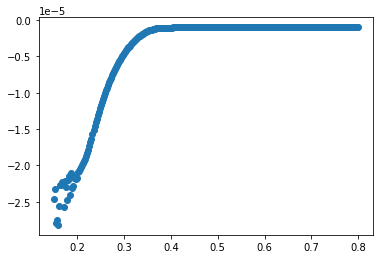

In [7]:
import matplotlib.pyplot as plt

plt.scatter(param,target)
print(target)

In [20]:
import pprint
pprint.pprint(history)

[{'datetime': {'datetime': '2022-06-02 19:11:22', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.15},
  'target': 2.466547322840756e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:22', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1522},
  'target': 2.3300893836578992e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1543},
  'target': 2.7916139904196577e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1565},
  'target': 2.7443275276943687e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:23', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1587},
  'target': 2.8174783522166515e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:24', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.1609},
  'target': 2.5641766501330933e-05},
 {'datetime': {'datetime': '2022-06-02 19:11:24', 'delta': 0.0, 'elapsed': 0.0},
  'params': {'a1': 0.163},
  'target': 2.26785

In [24]:
print(param)

[0.15, 0.1522, 0.1543, 0.1565, 0.1587, 0.1609, 0.163, 0.1652, 0.1674, 0.1696, 0.1717, 0.1739, 0.1761, 0.1783, 0.1804, 0.1826, 0.1848, 0.187, 0.1891, 0.1913, 0.1935, 0.1957, 0.1978, 0.2, 0.2022, 0.2043, 0.2065, 0.2087, 0.2109, 0.213, 0.2152, 0.2174, 0.2196, 0.2217, 0.2239, 0.2261, 0.2283, 0.2304, 0.2326, 0.2348, 0.237, 0.2391, 0.2413, 0.2435, 0.2457, 0.2478, 0.25, 0.2522, 0.2543, 0.2565, 0.2587, 0.2609, 0.263, 0.2652, 0.2674, 0.2696, 0.2717, 0.2739, 0.2761, 0.2783, 0.2804, 0.2826, 0.2848, 0.287, 0.2891, 0.2913, 0.2935, 0.2957, 0.2978, 0.3, 0.3022, 0.3043, 0.3065, 0.3087, 0.3109, 0.313, 0.3152, 0.3174, 0.3196, 0.3217, 0.3239, 0.3261, 0.3283, 0.3304, 0.3326, 0.3348, 0.337, 0.3391, 0.3413, 0.3435, 0.3457, 0.3478, 0.35, 0.3522, 0.3543, 0.3565, 0.3587, 0.3609, 0.363, 0.3652, 0.3674, 0.3696, 0.3717, 0.3739, 0.3761, 0.3783, 0.3804, 0.3826, 0.3848, 0.387, 0.3891, 0.3913, 0.3935, 0.3957, 0.3978, 0.4, 0.4022, 0.4043, 0.4065, 0.4087, 0.4109, 0.413, 0.4152, 0.4174, 0.4196, 0.4217, 0.4239, 0.4261, 0